# Practice Problems
## Lesson 6: Regression
---
Created by Terron Ishihara, Modified by Univerisity of Washington, AI4All, 2020

# Problem 1

Let's explore regression using scikit-learn. We'll use a [dataset on diabetes](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html), with 442 samples and 10 different features. We will focus on using a single feature, body mass index. The target values are a quantitative measure of diabetes progression one year after baseline.

> To start, we import the models, the dataset, and some extra tools.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error
import pandas as pd
import time

diabetes = load_diabetes()
# Get the data samples and extract the feature at index 2,
# which is body mass index
X = diabetes.data[:, np.newaxis, 2]
y = diabetes.target

> Now we can split our dataset into training and test sets. The `train_test_split()` method can do this for us. Here we use an 80/20 split. Then we create the regression classifiers, train them on the training set, and evaluate the models on the test set, printing out the mean squared error. 

In [8]:
# Partition the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

# Instantiate the classifiers
lin_clf = LinearRegression()
# The parameters here are the default values for LogisticRegression,
# included here just to suppress a couple warnings
log_clf = LogisticRegression(solver='lbfgs', multi_class='multinomial')

# Train the classifiers
lin_clf.fit(X_train, y_train)
log_clf.fit(X_train, y_train)

# Calculate predictions on test set
lin_predictions = lin_clf.predict(X_test)
log_predictions = log_clf.predict(X_test)

> To get a better idea of what these models look like, let's plot the models' predictions on top of the test set.

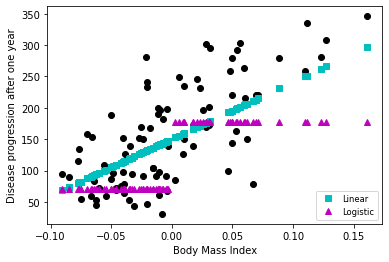

In [9]:
import matplotlib.pyplot as plt

# Plot the dataset points
plt.scatter(X_test, y_test, color='black')

# Plot the linear regression predictions
# 'cs' means cyan is the color, square is the shape
plt.plot(X_test, lin_predictions, 'cs')

# Plot the logistic regression predictions
# 'm^' means magenta is the color, triangle is the shape
plt.plot(X_test, log_predictions, 'm^')

# Label axes and legend
plt.xlabel("Body Mass Index")
plt.ylabel("Disease progression after one year")
plt.legend(('Linear', 'Logistic'),
           loc="lower right", fontsize='small')
# Show the plot
plt.show()

> Recall the formula for the error function of our linear regression model, as an example: $w_1x+w_0-y$. We take the input, $x$, place it into our linear model, $w_1x+w_0$, and subtract the true value, $y$. A useful measure of how closely our model predicts all the test samples is Mean Squared Error (MSE). We simply square all of our error values, sum those squares, then divide by $N$ to calculate the mean squared error:

>> $\frac{1}{N}\sum_{i=1}^N (w_1x+w_0-y)^2$

> The logistic regression model has the same calculation for MSE, but with the sigmoid function as the model: $\frac{1}{1+e^{-(w_1x+w_0)}}$.

> Given the above plot, which regression classifier do you think has a larger mean squared error? Check your answer by printing out the values below.

In [10]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(lin_predictions, y_test)
log_mse = mean_squared_error(log_predictions, y_test)

## practice problems with regression


We need to define some functions for the following exercise. Can you understand what the purpose of each function is?


In [12]:
def generating_func(x, err=0.5):
    '''
    Takes a value x and err (error). Returns a random sample from a normal
    Gaussian distribution with the mean x and standard deviation err.
    '''
    return np.random.normal(10 - 1. / (x + 0.1), err)


def change_params(model):
    '''
    Note: Linear regression model equation is in the form: y = mx + b.
    m = slope
    b = y-intercept
    This functions takes a linear regression model, slope,
    y-intercept and changes the model's slope and y-intercept.
    '''
    new_m = float(input('Type a number for the slope (m): '))
    new_b = float(input('Type a number for the y-intercept (b): '))
    model.intercept_ = new_b
    model.coef_ = np.array([new_m])


def show_model_values(model):
    '''
    This functions takes a linear regression model and
    returns the model's slope and y-intercept.
    '''
    print('\nmodel\'s current slope:', model.coef_[0])
    print('model\'s current y-intercept:', model.intercept_)


def graph(model, x, y, x_test):
    '''
    This functions takes a linear regression model, x and y values, and  
    x_test (same values as x values) and plots the model's prediction of y
    values from x_test values.
    '''
    plt.scatter(x, y, marker='x', c='k', s=50)
    plt.plot(x_test, model.predict(x_test[:, np.newaxis]), '-b')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('price (y-value) vs house size (x-value) in the form: y = mx + b')
    plt.grid()
    plt.axhline()
    plt.axvline()
    plt.show()
    plt.clf()

def evaluate(model, x, y):
    y_pred = model.predict(x[:, np.newaxis])
    print("\nMean squared error value for model's predicted versus actual y values: ", mean_squared_error(y, y_pred))


Now comes your part

Note: To change the slope and y-intercept of the linear regression model, close out of the plot window
Line of fit when the data is fitted into the linear regression model


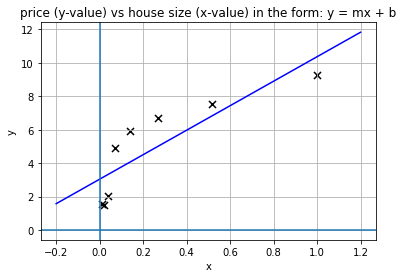


model's current slope: 7.331946067518556
model's current y-intercept: 3.037298915461105

Mean squared error value for model's predicted versus actual y values:  2.118211764426163

Options:
0: To quit
1: Change the model's slope and y-intercept
2. Replot the previous slope and y-intercept for the model
3. Show x and y values

Select a choice from the choices in the options: 1

Type a number for the slope (m): 9.1
Type a number for the y-intercept (b): 3.1



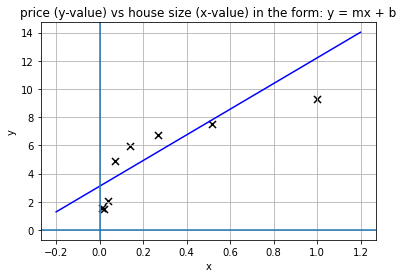


model's current slope: 9.1
model's current y-intercept: 3.1

Mean squared error value for model's predicted versus actual y values:  2.713334894553535

Options:
0: To quit
1: Change the model's slope and y-intercept
2. Replot the previous slope and y-intercept for the model
3. Show x and y values



In [ ]:
print('Note: To change the slope and y-intercept of the linear regression model, close out of the plot window')
current_time = time.gmtime()
seconds = time.mktime(current_time)
# print('Ignore time expressed in seconds since the epoch:', seconds)
# Definitely could modify this code such that our data changes
n_samples = 8
np.random.seed(int(seconds / 13))
x = 10 ** np.linspace(-2, 0, n_samples)
y = generating_func(x)
x_test = np.linspace(-0.2, 1.2, 1000)
model = LinearRegression()
model.fit(x[:, np.newaxis], y)
print('Line of fit when the data is fitted into the linear regression model')
graph(model, x, y, x_test)
end = False
while end != True:
    show_model_values(model)
    evaluate(model, x, y)
        
    plot = False
    print('\nOptions:\n0: To quit\n1: Change the model\'s slope and y-intercept\n2. Replot the previous slope and y-intercept for the model\n3. Show x and y values\n')
    choice = int(input('Select a choice from the choices in the options: '))
    print()
    if choice == 0:
        end = True
    elif choice == 1:
        change_params(model)
        plot = True
        print()
    elif choice == 2:
        plot = True
    elif choice == 3:
        print('x values:', x)
        print('y values:', y)
    else:
        print('Invalid choice. Please select one of the options.')
        
    if plot == True:
         graph(model, x, y, x_test)
        